In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [7]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

Data downloaded!


In [15]:
with open(r'C:\Users\inner\newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [20]:
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods_data = newyork_data['features']

In [22]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [23]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [24]:
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [25]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [26]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


In [27]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

In [28]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
CLIENT_ID = 'I1F4PKZKFT1U3E41CAY4RSOASCPWSI5WETW1KK3G55XT5KUY' # your Foursquare ID
CLIENT_SECRET = 'USMH22AWLBXXHBWFYS1DNXQNLA0KB1QXWR1GTFWCS4UDCCOG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: I1F4PKZKFT1U3E41CAY4RSOASCPWSI5WETW1KK3G55XT5KUY
CLIENT_SECRET:USMH22AWLBXXHBWFYS1DNXQNLA0KB1QXWR1GTFWCS4UDCCOG


In [29]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [30]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [31]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )


Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [308]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped= manhattan_onehot.groupby('Neighborhood').sum().sum(axis=1)
manhattan_grouped.rename('Num of Venus')
manDF=pd.DataFrame(manhattan_grouped.reset_index())
manDF.columns=['Neighborhood','Num of Venus']
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Number of Venue in Manhattan Neighborhood')

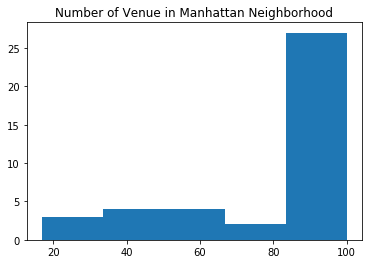

In [250]:
plt.hist(manDF['Num of Venus'], bins = 5)
plt.title('Number of Venues in Manhattan Neighborhood')

# Get Toronto Data

In [41]:
import pandas as pd
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

In [42]:
data, = pd.read_html(url, match="Postcode",header = 0)
data.rename(columns = {'Postcode':'PostalCode'}, inplace = True)
data.head()

,PostalCode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


In [43]:
data = data[data["Borough"] != "Not assigned"]
data.head()

,PostalCode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor


In [44]:
borough_func = lambda s: s.iloc[0]
neighborhood_func = lambda s: ", ".join(s)
agg_funcs = {"Borough": borough_func, "Neighbourhood": neighborhood_func}
data_temp = data.groupby(by="PostalCode").aggregate(agg_funcs)
data_temp.head()

,Borough,Neighbourhood
PostalCode,,
M1B,Scarborough,"Rouge, Malvern"
M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
M1E,Scarborough,"Guildwood, Morningside, West Hill"
M1G,Scarborough,Woburn
M1H,Scarborough,Cedarbrae


In [45]:
data = data_temp.reset_index()[data.columns]
data.head()

,PostalCode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [46]:
data[data["Neighbourhood"] == "Not assigned"]

,PostalCode,Borough,Neighbourhood
93,M9A,Queen's Park,Not assigned


In [47]:
for (j, row) in data.iterrows():
    if row["Neighbourhood"] == "Not assigned":
        borough = row["Borough"]
        print("Replace and test \"Not assigned\" => %s in row %i" % (borough, j))
        row["Neighbourhood"] = borough

Replace and test "Not assigned" => Queen's Park in row 93


In [48]:
data.shape
data.head()

,PostalCode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [51]:
locations = pd.read_csv("https://cocl.us/Geospatial_data")
locations.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [52]:
locations.columns = ["PostalCode", "Latitude", "Longitude"]
data2 = pd.merge(data, locations, on="PostalCode")
data2.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [53]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import json # library to handle JSON files
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

In [54]:
TORdata=data2[data2['Borough'].str.contains("Toronto")].reset_index(drop=True)
TORdata.head()

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [55]:
address = 'Toronto'

geolocator = Nominatim(user_agent="Toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))


The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [56]:
map_Toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

In [57]:
for lat, lng, borough, neighborhood in zip(TORdata['Latitude'], TORdata['Longitude'], TORdata['Borough'], TORdata['Neighbourhood']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=folium.Popup('{}, {}'.format(neighborhood, borough), parse_html=True),
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  

map_Toronto

### Foursquare Credentials

In [59]:
CLIENT_ID = 'I1F4PKZKFT1U3E41CAY4RSOASCPWSI5WETW1KK3G55XT5KUY' # your Foursquare ID
CLIENT_SECRET = 'USMH22AWLBXXHBWFYS1DNXQNLA0KB1QXWR1GTFWCS4UDCCOG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [60]:
TORdata.loc[0, 'Neighbourhood']

'The Beaches'

In [61]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

toronto_venues = getNearbyVenues(names=TORdata['Neighbourhood'],
                                   latitudes=TORdata['Latitude'],
                                   longitudes=TORdata['Longitude']
                                  )

The Beaches
The Danforth West, Riverdale
The Beaches West, India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North, Forest Hill West
The Annex, North Midtown, Yorkville
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie
Dovercourt Village, Dufferin
Little Portugal, Trinity
Brockton, Exhibition Place, Parkdale Village
High Park, The Junction Sout

In [62]:
print(toronto_venues.shape)
toronto_venues.head()

(1691, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Glen Stewart Park,43.675278,-79.294647,Park
4,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood


## Analyze Each Neighborhood

In [63]:
Toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]

Toronto_onehot.head()

,Yoga Studio,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
Toronto_onehot.shape

(1691, 228)

Text(0.5, 1.0, 'Number of Venues in Toronto Neighborhood')

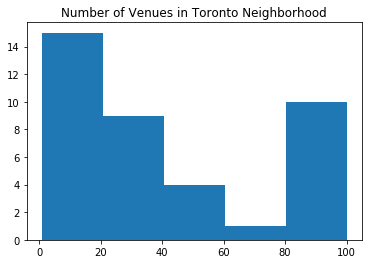

In [309]:
toronto_grouped = Toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped = Toronto_onehot.groupby('Neighborhood').sum().sum(axis=1)
plt.hist(toronto_grouped, bins = 5)
plt.title('Number of Venues in Toronto Neighborhood')

### Top 10 venues for each neighborhood

In [66]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Steakhouse,Thai Restaurant,Café,Burger Joint,Restaurant,Bakery,Bar,Cosmetics Shop,Sushi Restaurant
1,Berczy Park,Coffee Shop,Steakhouse,Farmers Market,Seafood Restaurant,Cocktail Bar,Bakery,Beer Bar,Cheese Shop,Café,Greek Restaurant
2,"Brockton, Exhibition Place, Parkdale Village",Café,Breakfast Spot,Coffee Shop,Performing Arts Venue,Bar,Bakery,Intersection,Italian Restaurant,Restaurant,Burrito Place
3,Business Reply Mail Processing Centre 969 Eastern,Light Rail Station,Yoga Studio,Auto Workshop,Comic Shop,Park,Pizza Place,Butcher,Burrito Place,Restaurant,Brewery
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Service,Airport Lounge,Airport Terminal,Boat or Ferry,Coffee Shop,Boutique,Rental Car Location,Bar,Harbor / Marina,Sculpture Garden


In [67]:
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0,
       3, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 4, 4, 0])

In [68]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
toronto_merged = TORdata
toronto_merged.rename(columns={'Neighbourhood':'Neighborhood'},inplace = True)
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,4,Park,Trail,Health Food Store,Pub,Cupcake Shop,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run,Discount Store
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,0,Greek Restaurant,Italian Restaurant,Coffee Shop,Ice Cream Shop,Furniture / Home Store,Frozen Yogurt Shop,Pub,Pizza Place,Liquor Store,Juice Bar
2,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,4,Sandwich Place,Food & Drink Shop,Light Rail Station,Brewery,Liquor Store,Burger Joint,Italian Restaurant,Burrito Place,Pub,Ice Cream Shop
3,M4M,East Toronto,Studio District,43.659526,-79.340923,0,Café,Coffee Shop,Bakery,Italian Restaurant,Brewery,American Restaurant,Gastropub,Yoga Studio,Clothing Store,Bookstore
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,3,Park,Swim School,Bus Line,Dance Studio,Dumpling Restaurant,Donut Shop,Doner Restaurant,Dog Run,Discount Store,Diner


In [69]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [76]:
manhattan_grouped.columns
manhattan_grouped_clustering=manhattan_grouped.drop('Neighborhood', 1)
manhattan_grouped_clustering.columns

Index(['Accessories Store', 'Adult Boutique', 'Afghan Restaurant',
       'African Restaurant', 'American Restaurant', 'Antique Shop', 'Arcade',
       'Arepa Restaurant', 'Argentinian Restaurant', 'Art Gallery',
       ...
       'Vietnamese Restaurant', 'Volleyball Court', 'Waterfront',
       'Weight Loss Center', 'Whisky Bar', 'Wine Bar', 'Wine Shop',
       'Wings Joint', 'Women's Store', 'Yoga Studio'],
      dtype='object', length=330)

In [127]:
manhattan_grouped_clustering.head(2)

,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,...,Vietnamese Restaurant,Volleyball Court,Waterfront,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,0.0,0.0,0.0,0.0,0.010417,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.020833,0.0,0.020833,0.000000
1,0.0,0.0,0.0,0.0,0.010204,0.0,0.0,0.0,0.010204,0.0,...,0.020408,0.0,0.0,0.0,0.0,0.010204,0.030612,0.0,0.010204,0.030612


In [71]:
toronto_grouped_clustering.columns

Index(['Yoga Studio', 'Afghan Restaurant', 'Airport', 'Airport Food Court',
       'Airport Gate', 'Airport Lounge', 'Airport Service', 'Airport Terminal',
       'American Restaurant', 'Antique Shop',
       ...
       'Theme Restaurant', 'Toy / Game Store', 'Trail', 'Train Station',
       'Vegetarian / Vegan Restaurant', 'Video Game Store',
       'Vietnamese Restaurant', 'Wine Bar', 'Wings Joint', 'Women's Store'],
      dtype='object', length=227)

In [78]:
toronto_grouped_clustering.shape

(39, 227)

In [154]:
combine=pd.concat([manhattan_grouped_clustering, toronto_grouped_clustering], axis=0, ignore_index=False,sort=False)
combine

,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,...,Lake,Light Rail Station,Mac & Cheese Joint,Portuguese Restaurant,Poutine Place,Stadium,Swim School,Tanning Salon,Theme Restaurant,Train Station
0,0.00,0.0,0.0000,0.000000,0.010417,0.000000,0.00,0.00,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.00,0.0,0.0000,0.000000,0.010204,0.000000,0.00,0.00,0.010204,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.00,0.0,0.0000,0.045455,0.045455,0.000000,0.00,0.00,0.000000,0.022727,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.00,0.0,0.0000,0.000000,0.030000,0.000000,0.00,0.00,0.000000,0.030000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.00,0.0,0.0000,0.000000,0.040000,0.000000,0.00,0.00,0.000000,0.010000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.00,0.0,0.0000,0.000000,0.030000,0.010000,0.00,0.00,0.000000,0.010000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.00,0.0,0.0000,0.000000,0.040000,0.000000,0.00,0.00,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.00,0.0,0.0000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.00,0.0,0.0000,0.000000,0.020000,0.000000,0.00,0.01,0.010000,0.010000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.01,0.0,0.0000,0.000000,0.050000,0.000000,0.00,0.00,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
combine[np.isnan(combine)] = 0

In [156]:
np.isnan(combine).values.any()

False

In [160]:
combine

,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,...,Lake,Light Rail Station,Mac & Cheese Joint,Portuguese Restaurant,Poutine Place,Stadium,Swim School,Tanning Salon,Theme Restaurant,Train Station
0,0.00,0.0,0.0000,0.000000,0.010417,0.000000,0.00,0.00,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.0000,0.00
1,0.00,0.0,0.0000,0.000000,0.010204,0.000000,0.00,0.00,0.010204,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.0000,0.00
2,0.00,0.0,0.0000,0.045455,0.045455,0.000000,0.00,0.00,0.000000,0.022727,...,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.0000,0.00
3,0.00,0.0,0.0000,0.000000,0.030000,0.000000,0.00,0.00,0.000000,0.030000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.0000,0.00
4,0.00,0.0,0.0000,0.000000,0.040000,0.000000,0.00,0.00,0.000000,0.010000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.0000,0.00
5,0.00,0.0,0.0000,0.000000,0.030000,0.010000,0.00,0.00,0.000000,0.010000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.0000,0.00
6,0.00,0.0,0.0000,0.000000,0.040000,0.000000,0.00,0.00,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.0000,0.00
7,0.00,0.0,0.0000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.0000,0.00
8,0.00,0.0,0.0000,0.000000,0.020000,0.000000,0.00,0.01,0.010000,0.010000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.0000,0.00
9,0.01,0.0,0.0000,0.000000,0.050000,0.000000,0.00,0.00,0.000000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.0000,0.00


In [372]:
kclusters = 10

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(combine)

# check cluster labels generated for each row in the dataframe
kmeans.labels_
kmeansseries=pd.Series(kmeans.labels_)
kmeansseries

0     2
1     2
2     2
3     2
4     2
5     2
6     2
7     9
8     2
9     8
10    2
11    2
12    2
13    9
14    2
15    9
16    2
17    2
18    2
19    2
20    2
21    9
22    9
23    2
24    2
25    9
26    2
27    2
28    9
29    2
     ..
49    8
50    8
51    9
52    6
53    8
54    8
55    2
56    8
57    5
58    1
59    8
60    8
61    2
62    7
63    2
64    4
65    8
66    2
67    8
68    4
69    3
70    2
71    2
72    8
73    8
74    2
75    9
76    5
77    2
78    2
Length: 79, dtype: int32

In [367]:
manhattan_grouped=pd.DataFrame(manhattan_grouped)
toronto_grouped=pd.DataFrame(toronto_grouped)
manhattan_grouped['Borough']='Manhattan'
toronto_grouped['Borough']='Toronto'
manhattan_grouped.reset_index(inplace=True)
toronto_grouped.reset_index(inplace=True)

In [368]:
manhattan_grouped[['Neighborhood','Borough']]
toronto_grouped[['Neighborhood','Borough']]

,Neighborhood,Borough
0,"Adelaide, King, Richmond",Toronto
1,Berczy Park,Toronto
2,"Brockton, Exhibition Place, Parkdale Village",Toronto
3,Business Reply Mail Processing Centre 969 Eastern,Toronto
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",Toronto
5,"Cabbagetown, St. James Town",Toronto
6,Central Bay Street,Toronto
7,"Chinatown, Grange Park, Kensington Market",Toronto
8,Christie,Toronto
9,Church and Wellesley,Toronto


In [383]:
neighb=pd.concat([manhattan_grouped[['Neighborhood','Borough']],toronto_grouped[['Neighborhood','Borough']]],ignore_index=True)
neighb.reset_index()
neighb

,Neighborhood,Borough
0,Battery Park City,Manhattan
1,Carnegie Hill,Manhattan
2,Central Harlem,Manhattan
3,Chelsea,Manhattan
4,Chinatown,Manhattan
5,Civic Center,Manhattan
6,Clinton,Manhattan
7,East Harlem,Manhattan
8,East Village,Manhattan
9,Financial District,Manhattan


In [384]:
kmeansseries1=pd.DataFrame(kmeansseries)
kmeansseries1.rename({"0":'Cluster'},axis=1,inplace=True)
kmeansseries1

,0
0,2
1,2
2,2
3,2
4,2
5,2
6,2
7,9
8,2
9,8


In [396]:
df=neighb.merge(kmeansseries1, left_index=True, right_index=True)
df.columns=['Neighborhood', 'Borough', "Cluster"]
df[df['Cluster']==9]

,Neighborhood,Borough,Cluster
7,East Harlem,Manhattan,9
13,Hamilton Heights,Manhattan,9
15,Inwood,Manhattan,9
21,Manhattanville,Manhattan,9
22,Marble Hill,Manhattan,9
25,Morningside Heights,Manhattan,9
28,Roosevelt Island,Manhattan,9
33,Tudor City,Manhattan,9
51,Davisville,Toronto,9
75,"The Annex, North Midtown, Yorkville",Toronto,9
